データセット：MNIST<br>
フレームワーク：Pytorch<br>
アーキテクチャ：CNN(講義資料から)<br>



In [0]:
#ライブラリのインポート
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

In [3]:
data_folder = '~/data'
BATCH_SIZE = 8

mnist_data = MNIST(data_folder, train=True, download=True, transform=transforms.ToTensor())
data_loader = DataLoader(mnist_data, batch_size=BATCH_SIZE, shuffle=False)

0it [00:00, ?it/s]

9920512it [00:01, 8920474.64it/s]                            


Extracting /root/data/MNIST/raw/train-images-idx3-ubyte.gz to /root/data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 135939.14it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/data/MNIST/raw


1654784it [00:00, 2198702.81it/s]                            
0it [00:00, ?it/s]

Extracting /root/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/data/MNIST/raw


8192it [00:00, 51738.18it/s]            


Extracting /root/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/data/MNIST/raw
Processing...
Done!


In [3]:
data_iterator = iter(data_loader)
images, labels = data_iterator.next()

print(len(images))
print(len(labels))

8
8


In [4]:
print(images.shape)
print(labels.shape)

torch.Size([8, 1, 28, 28])
torch.Size([8])


(1, 28, 28)


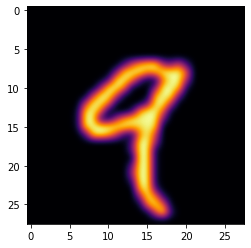

label: tensor(9)


In [5]:
#データを可視化
location=4
data = images[location].numpy()
print(data.shape)

reshaped_data = data.reshape(28,28)
plt.imshow(reshaped_data, cmap='inferno', interpolation='bicubic')
plt.show()
print('label:', labels[location])


In [0]:
#学習データ
train_data_with_labels = MNIST(data_folder, train=True, download=True, transform=transforms.ToTensor())
train_data_loader = DataLoader(train_data_with_labels, batch_size=BATCH_SIZE, shuffle=True)

#検証データ
test_data_with_labels = MNIST(data_folder, train=False, download=True, transform=transforms.ToTensor())
test_data_loader = DataLoader(test_data_with_labels, batch_size=BATCH_SIZE, shuffle=True)

In [0]:
#フィードフォワードニューラルネットワーク

from torch.autograd import Variable
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    #入力層
    self.layer1 = nn.Linear(28 * 28, 100)
    #中間層（隠れ層）
    self.layer2 = nn.Linear(100, 50)
    #出力層
    self.layer3 = nn.Linear(50, 10)

  def forward(self, input_data):
    input_data = input_data.view(-1, 28 * 28)
    input_data = self.layer1(input_data)
    input_data = self.layer2(input_data)
    input_data = self.layer3(input_data)
    return input_data
  
class simpleCNN(nn.Module):
  def __init__(self):
    super(simpleCNN, self).__init__()
    self.cnn_list = nn.Sequential(*[
      #画像サイズ：2８＊2８＊１  
      nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2),
      #画像サイズ：14＊14＊１6
      nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2),
      #画像サイズ：7＊7＊32
      nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=7, stride=2)])
    #画像サイズ:1*1*256
    self.output = nn.Linear(64, 10)
  
  def forward(self, x):
# x = x.view(-1, 28 * 28)
    x = self.cnn_list(x).squeeze()
#    x = x.view(x.size(0), -1)
    x = self.output(x)
    return x

In [0]:
#model = MLP()
model = simpleCNN()

In [0]:
import torch.optim as optimizer
#ソフトマッックス：クロスエントロピー
lossResult = nn.CrossEntropyLoss()
#optimizer = optimizer.SGD(model.parameters(), lr=0.01)
optimizer = optimizer.Adam(model.parameters(), lr=0.001)

In [26]:
MAX_EPOCH = 4

for epoch in range(MAX_EPOCH):
  total_loss = 0.0
  for i, data in enumerate(train_data_loader):
    #dataから学習対象データと教師ラベルデータを取り出す
    train_data, teacher_labels = data
    #入力をtorch.autograd.Variableに変換
    train_data, teacher_labels = Variable(train_data), Variable(teacher_labels)

    #計算された勾配情報を削除
    optimizer.zero_grad()

    #モデルに学習データを与えて予測を計算
    outputs = model(train_data)

    #lossとwによる微分計算
    loss = lossResult(outputs, teacher_labels)
    loss.backward()

    #勾配を更新
    optimizer.step()

    #誤差を計算する
    total_loss += loss.detach().numpy()

    #2000ミニバッチずつ、進捗を表示する
    if i % 2000 == 1999:
      print('学習進捗：[%d, %d] 学習誤差（loss）: %.3f' % (epoch+1, i+1, total_loss/2000))
      total_loss = 0.0
  
  print('学習終了')

学習進捗：[1, 2000] 学習誤差（loss）: 0.084
学習進捗：[1, 4000] 学習誤差（loss）: 0.070
学習進捗：[1, 6000] 学習誤差（loss）: 0.069
学習終了
学習進捗：[2, 2000] 学習誤差（loss）: 0.057
学習進捗：[2, 4000] 学習誤差（loss）: 0.050
学習進捗：[2, 6000] 学習誤差（loss）: 0.050
学習終了
学習進捗：[3, 2000] 学習誤差（loss）: 0.039
学習進捗：[3, 4000] 学習誤差（loss）: 0.039
学習進捗：[3, 6000] 学習誤差（loss）: 0.042
学習終了
学習進捗：[4, 2000] 学習誤差（loss）: 0.035
学習進捗：[4, 4000] 学習誤差（loss）: 0.031
学習進捗：[4, 6000] 学習誤差（loss）: 0.034
学習終了


optimizer = optimizer.SGD(model.parameters(), lr=0.01)<br>
学習進捗：[1, 2000] 学習誤差（loss）: 1.458<br>
学習進捗：[1, 4000] 学習誤差（loss）: 0.274<br>
学習進捗：[1, 6000] 学習誤差（loss）: 0.176<br>
学習終了<br>
学習進捗：[2, 2000] 学習誤差（loss）: 0.115<br>
学習進捗：[2, 4000] 学習誤差（loss）: 0.106<br>
学習進捗：[2, 6000] 学習誤差（loss）: 0.091<br>
学習終了<br>
学習進捗：[3, 2000] 学習誤差（loss）: 0.075<br>
学習進捗：[3, 4000] 学習誤差（loss）: 0.076<br>
学習進捗：[3, 6000] 学習誤差（loss）: 0.067<br>
学習終了<br>
学習進捗：[4, 2000] 学習誤差（loss）: 0.057<br>
学習進捗：[4, 4000] 学習誤差（loss）: 0.055<br>
学習進捗：[4, 6000] 学習誤差（loss）: 0.055<br>
学習終了<br>
<br>
optimizer = optimizer.Adam(model.parameters(), lr=0.001)<br>
学習進捗：[1, 2000] 学習誤差（loss）: 0.084<br>
学習進捗：[1, 4000] 学習誤差（loss）: 0.070<br>
学習進捗：[1, 6000] 学習誤差（loss）: 0.069<br>
学習終了<br>
学習進捗：[2, 2000] 学習誤差（loss）: 0.057<br>
学習進捗：[2, 4000] 学習誤差（loss）: 0.050<br>
学習進捗：[2, 6000] 学習誤差（loss）: 0.050<br>
学習終了<br>
学習進捗：[3, 2000] 学習誤差（loss）: 0.039<br>
学習進捗：[3, 4000] 学習誤差（loss）: 0.039<br>
学習進捗：[3, 6000] 学習誤差（loss）: 0.042<br>
学習終了<br>
学習進捗：[4, 2000] 学習誤差（loss）: 0.035<br>
学習進捗：[4, 4000] 学習誤差（loss）: 0.031<br>
学習進捗：[4, 6000] 学習誤差（loss）: 0.034<br>
学習終了<br>


In [27]:
#検証
import torch

#トータル
total = 0
#正解カウンター
count_when_correct = 0

for data in test_data_loader:
  #検証ローダーからデータを取り出した上、アンパック
  test_data, teacher_labels = data
  #テストデータを変換した上、モデルに渡して、判定
  results = model(Variable(test_data))
  #予測を取り出す
  _, predicted = torch.max(results.data, 1)
  #
  total += teacher_labels.size(0)
  count_when_correct += (predicted == teacher_labels).sum()

print('count_when_correct:%d' % (count_when_correct))
print('total:%d' % (total))

print('正解率:%d / %d = %f' % (count_when_correct, total, int(count_when_correct) / int(total)))

count_when_correct:9895
total:10000
正解率:9895 / 10000 = 0.989500


count_when_correct:9895<br>
total:10000<br>
正解率:9895 / 10000 = 0.989500<br>

ラベル: tensor(1)


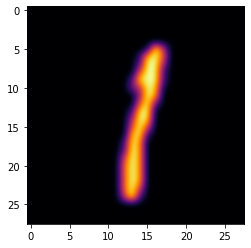

In [20]:
#個別データで検証

test_iterator = iter(test_data_loader)
#ここで回数を増減して、違うテストデータを取り出す
test_data, teacher_labels = test_iterator.next()
#テストデータを変換した上、モデルに渡して、判定
results = model(Variable(test_data))
_, predicted_label = torch.max(results.data, 1)

location = 3
plt.imshow(test_data[location].numpy().reshape(28, 28), cmap='inferno', interpolation='bicubic')
print('ラベル:', predicted_label[location])

In [0]:
model = simpleCNN()

MAX_EPOCH = 4

for epoch in range(MAX_EPOCH):
  total_loss = 0.0
  for i, data in enumerate(train_data_loader):
    #dataから学習対象データと教師ラベルデータを取り出す
    train_data, teacher_labels = data
    #入力をtorch.autograd.Variableに変換
    train_data, teacher_labels = Variable(train_data), Variable(teacher_labels)

    #計算された勾配情報を削除
    optimizer.zero_grad()

    #モデルに学習データを与えて予測を計算
    outputs = model(train_data)

    #lossとwによる微分計算
    loss = lossResult(outputs, teacher_labels)
    loss.backward()

    #勾配を更新
    optimizer.step()

    #誤差を計算する
    total_loss += loss.detach().numpy()

    #2000ミニバッチずつ、進捗を表示する
    if i % 2000 == 1999:
      print('学習進捗：[%d, %d] 学習誤差（loss）: %.3f' % (epoch+1, i+1, total_loss/2000))
      total_loss = 0.0
  
  print('学習終了')